In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from preprocessor import Preprocessor
from pdf_reader import PDFReader
from vectorizer import Vectorizer
from document_evaluator import DocumentEvaluator

Continuous Score: 97.21


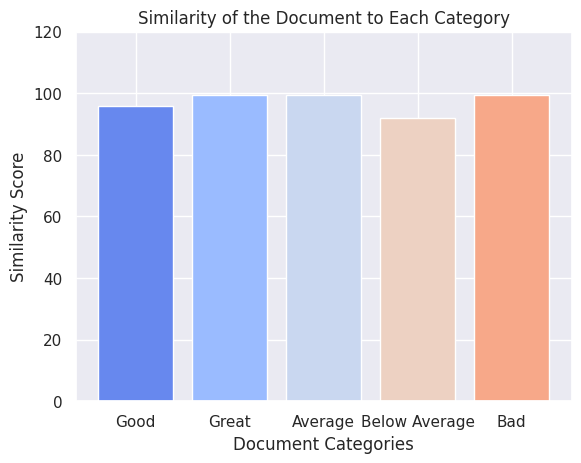

In [12]:
def extract_and_preprocess(file_paths, pdf_reader, preprocessor):
    return [preprocessor.process(pdf_reader.extract_text(file)) for file in file_paths]

# Initialize classes
preprocessor = Preprocessor()
pdf_reader = PDFReader()
vectorizer = Vectorizer("cbow_s1000.txt")

# Paths to the template documents categorized by quality
doc_paths_by_quality = {
    'Good': ["doc1.pdf"],
    'Great': ["doc2.pdf"],
    'Average': ["doc3.pdf"],
    'Below Average': ["doc4.pdf"],
    'Bad': ["doc5.pdf"]
}

# Extract and preprocess the template documents
doc_groups = {quality: extract_and_preprocess(paths, pdf_reader, preprocessor) for quality, paths in doc_paths_by_quality.items()}

# Vectorize each group's documents and then average those vectors to get a representative vector for each group
group_vectors = {group: np.mean([vectorizer.calculate_document_vector(doc) for doc in docs], axis=0) for group, docs in doc_groups.items()}

# Process the document to be analyzed
doc_path = "analyze.pdf"
doc = preprocessor.process(pdf_reader.extract_text(doc_path))
doc_vector = vectorizer.calculate_document_vector(doc)

# Calculate similarity with each group
group_similarities = {group: vectorizer.calculate_similarity(doc_vector, vec) * 100 for group, vec in group_vectors.items()}

# Showing results
categories = list(group_similarities.keys())
similarities = list(group_similarities.values())

# Calcs for continuous score
all_docs = sum(doc_groups.values(), [])  # Flatten the list of lists
all_docs_vectors = [vectorizer.calculate_document_vector(doc) for doc in all_docs]
document_evaluator = DocumentEvaluator(vectorizer, all_docs_vectors)
continuous_score = document_evaluator.evaluate_document(doc_vector)
print(f"Continuous Score: {continuous_score:.2f}")

# Graph plotting
sns.set_theme(style="darkgrid")
palette = sns.color_palette("coolwarm")
plt.bar(categories, similarities, color=[palette[0], palette[1], palette[2], palette[3],palette[4]])
plt.xlabel('Document Categories')
plt.ylabel('Similarity Score')
plt.title('Similarity of the Document to Each Category')
plt.ylim([0, 120])
plt.show()